# To run this code for the first time, you need to uncomment and run the code in the following cell.

In [ ]:
# %%capture
# !pip install -r requirements.txt
# import nltk
# nltk.download('stopwords')
# !pip install --upgrade numpy==1.22

In [1]:
from __future__ import annotations

# To reload modules on update without restarting the kernel
%load_ext autoreload
%autoreload 2

from helpers import Corpus, Model
from sentence_transformers import SentenceTransformer

C:\Users\10258\AppData\Roaming\Python\Python39\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\10258\AppData\Roaming\Python\Python39\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\10258\AppData\Roaming\Python\Python39\site-packages\umap\distances.

In [2]:
core_concepts = {
    "artificial intelligence" : {
        "ai domain" : {},
        "ai system" : {
            "no risk ai system" : {},
            "high risk ai system" : {},
            "low risk ai system" : {}
        },
        "ai system development process" : {
            "ai system approach" : {},
            "ai system quality measure" : {},
            "ai system properties" : {},
        },
    },

    "data" : {
        "personal data" : {},
        "pseudo anonymous data" : {},
        "anonymous data" : {},
    },

    "organization or person" : {
        "provider" : {},
        "user" : {
            "affected entity" : {},
        },
        "regulator" : {
            "eu country" : {},
        },
    },

    "risk": {
        "data risk" : {
            "poisoning risk" : {},
        },
        "system risk" : {
            "terrorist attack risk" : {},
        },
        "risk management" : {},
    },

    "law": {
        "regulation": {
            "right": {},
            "rule": {},
            "requirement": {},
            "obligation": {},
        },
        "law text": {},
        "authority": {},
    },

    "market": {
        "product": {},
        "service": {},
    },

    "other": {},

    "system": {},
}

In [3]:
# Corpus based around top level core concepts
corpus = Corpus(
    source="https://docs.google.com/spreadsheets/d/e/2PACX-1vTSsp1oV819VYKVBC8JV3Cbsat2Q9iEL0Zh_-RMIRgrP3eR9RkWLceBVrzlBrEPlZ9sMnBROvKWo8Hm/pub?gid=0&single=true&output=csv",
    core_concepts = core_concepts
)
# corpus = Corpus()

['artificial intelligence', 'ai domain', 'ai system', 'no risk ai system', 'high risk ai system', 'low risk ai system', 'ai system development process', 'ai system approach', 'ai system quality measure', 'ai system properties', 'data', 'personal data', 'pseudo anonymous data', 'anonymous data', 'organization or person', 'provider', 'user', 'affected entity', 'regulator', 'eu country', 'risk', 'data risk', 'poisoning risk', 'system risk', 'terrorist attack risk', 'risk management', 'law', 'regulation', 'right', 'rule', 'requirement', 'obligation', 'law text', 'authority', 'market', 'product', 'service', 'other', 'system']
['artificial intelligence', 'data', 'law', 'organization or person', 'risk', 'market', 'other']


In [4]:
# corpus.extract_terms_from_pdf("Data/EU.pdf")
corpus.extract_terms_from_onto()

In [5]:
corpus.extract_hyponyms()

In [6]:
X, y = corpus.get_training_data()

In [7]:
model = Model(corpus, min_points=4, dimensions=10, clusterer="c-dbscan", reducer="umap")
# model = Model(corpus, min_points=4, dimensions=10, classifier="svm", reducer="none")

(954, 21)
(954,)
945
945


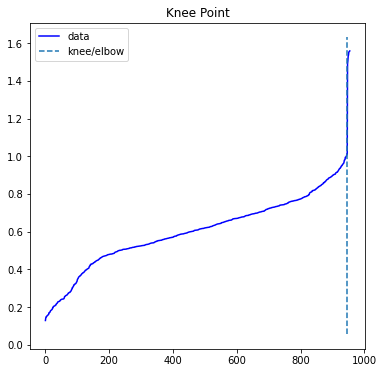

-0.04433332


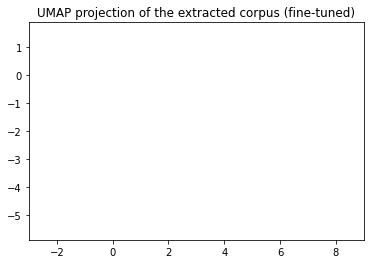

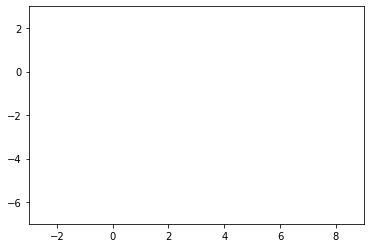

ValueError: All arrays must be of the same length

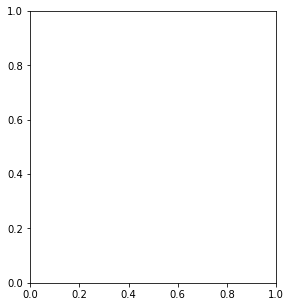

In [12]:
y_pred = model.iterate(X, y, 1, verbose=1)


In [9]:
print(y_pred)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  3  5  1  5  3  5  4  4  4  4
  4  4  2  3  2  2  2  2  2  3  5  1  5  6  1  4  0  4  0  5  4  4  4  3
  5  5  4  4  1  1  3  0  5  5  5  5  0  0  0  2  1  0  4  3  0  4  4  5
  3  6  4  1  4  3  0  1  0  5  3  1  4  1  3  0  3  3  0  1  0  6  1  4
  3  0  0  1  0  1  0  0  1  6  1  0  3  3  1  1  4  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  3  0  1  0  1  0  0  1  1  1  1  1  1  0  0  1
  0  0  1  0  1  1  5  1  3  4  2  2  2  3  1  1  1  1  1  1  0  0  1  1
  2  1  0  2  1  4  0  1  0  1  0  4  3  1  4  5  1  0  4  1  1  0  0  1
  1  1  1  1  0  2  1  5  0  4  4  0  0  0  0  0  0  3  0  3  4  0  4  5
  3  2  3  1  1  1  4  0  0  1  0  1  1  0  2  1  3  5  3  3  3  0  1  0
  1  1  1  0  0  5  1  1  1  0  5  2  0  2  1  1 -1  0 -1  1  1  1  0  6
  1  0  2  1  5  3  1  2  0  0  0  1  3  1  1  1  3  1  2  3  0  1  1  1
  1  1  1  0  0  0  4  4  3  2  2  1  1  1  2  4  5  4  3  4  3  0  0  1
  2  2  2  1  2  2  2  4  0  5  4  2  3  2  4  2  5